In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('2011-16 Starter.xlsx')
df

,Player,Pk,Age,SOS,FG,FGA,FG%,2P,2PA,2P%,...,BLK%,TOV%,AST:TOV,Hght\n(inches),Weight,RSCI Rank,Max Measured Wingspan (inches),Avg Measured Wingspan (inches,Difference,Starter
0,Kyrie Irving,1,19.096,8.31,7.3,13.7,0.529,4.9,8.6,0.569,...,1.8,16.4,1.722222,75,193,3.0,76.00,75.67,1.00,0
1,Brandon Knight,8,19.208,8.91,6.4,15.1,0.423,3.8,8.3,0.461,...,0.6,16.8,1.342857,75,195,5.0,78.75,78.38,3.75,0
2,Kemba Walker,9,21.051,10.44,8.2,19.2,0.428,6.2,13.3,0.471,...,0.5,9.5,2.000000,73,184,16.0,75.50,74.50,2.50,0
3,Jimmer Fredette,10,22.123,5.76,10.5,23.1,0.452,6.7,13.7,0.491,...,0.1,12.7,1.200000,74,195,NaN,77.00,76.75,3.00,0
4,Nolan Smith,21,22.338,8.31,8.3,18.0,0.458,6.4,12.9,0.501,...,0.2,14.8,1.621622,74,190,19.0,78.00,77.88,4.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Jahlil Okafor,3,19.197,9.87,9.8,14.7,0.664,9.8,14.7,0.664,...,4.5,15.6,0.515152,83,260,2.0,90.25,89.06,7.25,0
231,Jakob Poeltl,9,20.257,8.79,8.3,12.9,0.646,8.3,12.9,0.646,...,5.0,13.7,0.962963,84,248,NaN,86.75,85.88,2.75,0
232,Chinanu Onuaku,37,19.239,7.74,7.2,11.6,0.620,7.2,11.5,0.623,...,9.6,20.8,0.794118,82,245,63.0,86.75,86.63,4.75,0
233,Diamond Stone,40,19.138,8.31,8.3,14.6,0.568,8.3,14.6,0.568,...,7.1,12.9,0.269231,83,255,6.0,88.00,86.89,5.00,0


In [3]:
import dabl

In [4]:
df['RSCI Rank'] = pd.to_numeric(df['RSCI Rank'], errors='coerce')
df['RSCI Rank'] = df['RSCI Rank'].fillna(df['RSCI Rank'].mean())

Target looks like classification
Showing only top 10 of 43 continuous features


/opt/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:621: UserWarning: Dropped 1 outliers in column Age.
  int(dropped), series.name), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:621: UserWarning: Dropped 1 outliers in column RSCI Rank.
  int(dropped), series.name), UserWarning)


Linear Discriminant Analysis training set score: 0.686


/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


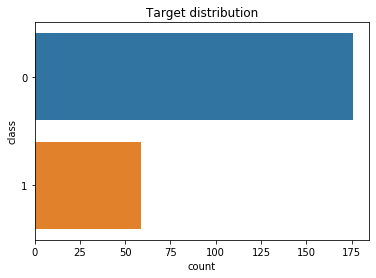

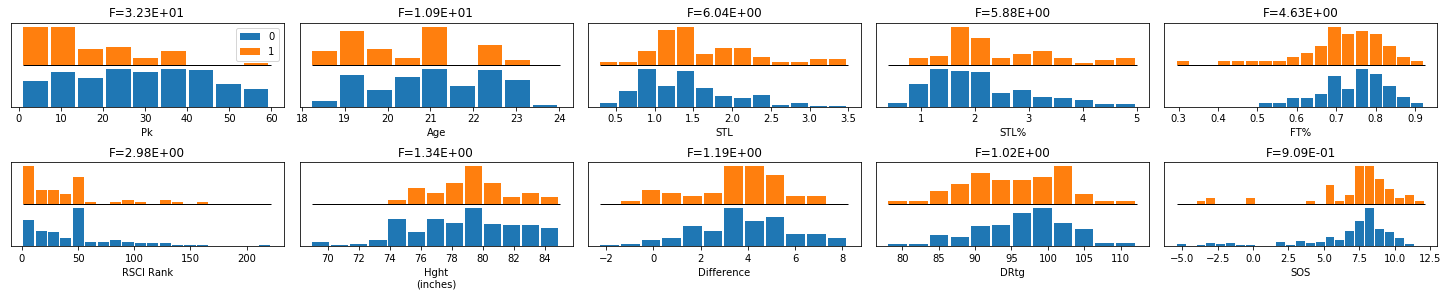

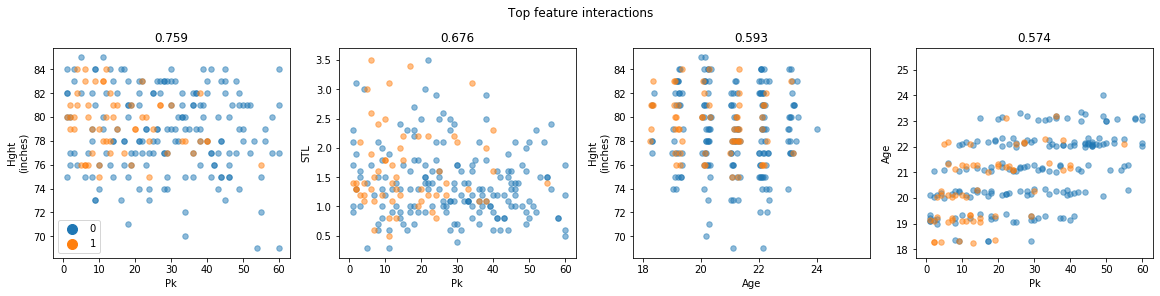

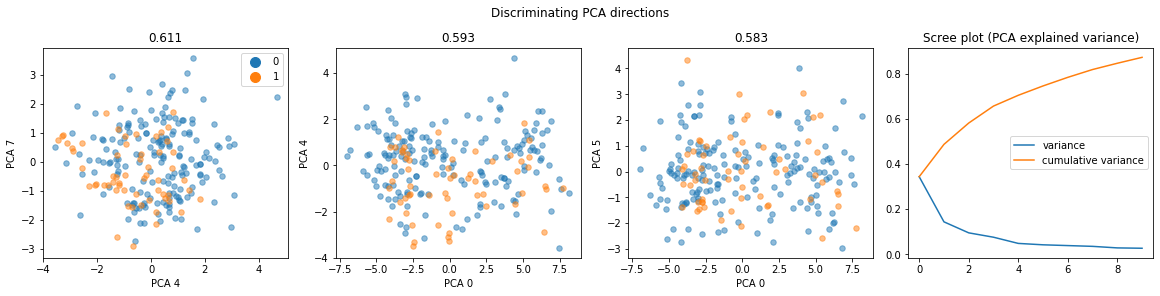

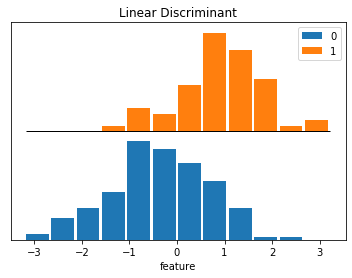

In [5]:
dabl.plot(df, target_col="Starter")

In [9]:
sc = dabl.SimpleClassifier()
sc.fit(df, target_col='Starter')

Running DummyClassifier(strategy='prior')
accuracy: 0.749 average_precision: 0.251 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.428
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.749 average_precision: 0.251 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.428

Running GaussianNB()
accuracy: 0.336 average_precision: 0.273 roc_auc: 0.551 recall_macro: 0.546 f1_macro: 0.319
=== new best GaussianNB() (using recall_macro):
accuracy: 0.336 average_precision: 0.273 roc_auc: 0.551 recall_macro: 0.546 f1_macro: 0.319

Running MultinomialNB()
accuracy: 0.741 average_precision: 0.373 roc_auc: 0.619 recall_macro: 0.494 f1_macro: 0.425
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.613 average_precision: 0.329 roc_auc: 0.640 recall_macro: 0.640 f1_macro: 0.580
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.613 average_precision: 0.329 roc_auc: 0.640 recall_macro: 0.640 f

SimpleClassifier(random_state=None, refit=True, shuffle=True, type_hints=None,
                 verbose=1)

In [10]:
X = df.drop(['Starter', 'Player'], axis=1)
y = df['Starter']

In [11]:
from xverse.transformer import MonotonicBinning

clf = MonotonicBinning()
clf.fit(X, y)

MonotonicBinning(cardinality_cutoff=5, custom_binning=None, feature_names='all',
                 force_bins=4, max_bins=20, prefix=None)

In [12]:
clf.bins

{'Pk': array([ 1., 17., 34., 60.]),
 'Age': array([18.242, 20.176, 22.024, 27.148]),
 'SOS': array([-5.39,  7.17,  8.31, 12.13]),
 'FG': array([ 3.5,  6.3,  7.4, 11.2]),
 'FGA': array([ 7.6, 12.9, 15.5, 23.1]),
 'FG%': array([0.369, 0.453, 0.5  , 0.664]),
 '2P': array([ 2.2,  4.7,  6.1, 10.2]),
 '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
 '2P%': array([0.376, 0.497, 0.541, 0.664]),
 '3P': array([0. , 0.8, 2. , 4.6]),
 '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
 '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
 'FT': array([1.1, 3.8, 5. , 8.7]),
 'FTA': array([ 1.9,  5.1,  6.8, 11.6]),
 'FT%': array([0.295, 0.706, 0.783, 0.925]),
 'TRB': array([ 2.8,  6.1,  9.6, 16.7]),
 'AST': array([ 0.2,  1.9,  3.4, 11.8]),
 'STL': array([0.3, 1.1, 1.6, 3.5]),
 'BLK': array([0. , 0.5, 1.2, 5.8]),
 'TOV': array([1. , 2.3, 3. , 5. ]),
 'PF': array([1.4, 2.5, 3.2, 7.6]),
 'PTS': array([ 9.9, 17.8, 21.1, 32.3]),
 'ORtg': array([ 95.5, 113.4, 119.2, 139. ]),
 'DRtg': array([ 78.1,  93.1,  99.6, 112.2]),
 'PER': arra

In [13]:
output_bins = clf.bins #will be used later in this exercise

In [14]:
out_X = clf.transform(X)

In [15]:
out_X.head()

,Pk,Age,SOS,FG,FGA,FG%,2P,2PA,2P%,3P,...,STL%,BLK%,TOV%,AST:TOV,Hght\n(inches),Weight,RSCI Rank,Max Measured Wingspan (inches),Avg Measured Wingspan (inches,Difference
0,"(0.999, 17.0]","(18.241, 20.176]","(7.17, 8.31]","(6.3, 7.4]","(12.9, 15.5]","(0.5, 0.664]","(4.7, 6.1]","(3.999, 9.1]","(0.541, 0.664]","(2.0, 4.6]",...,"(2.3, 5.0]","(1.4, 3.4]","(14.7, 27.8]","(1.375, 3.619]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(-2.251, 3.0]"
1,"(0.999, 17.0]","(18.241, 20.176]","(8.31, 12.13]","(6.3, 7.4]","(12.9, 15.5]","(0.368, 0.453]","(2.1990000000000003, 4.7]","(3.999, 9.1]","(0.375, 0.497]","(2.0, 4.6]",...,"(0.399, 1.7]","(0.099, 1.4]","(14.7, 27.8]","(0.794, 1.375]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(3.0, 4.5]"
2,"(0.999, 17.0]","(20.176, 22.024]","(8.31, 12.13]","(7.4, 11.2]","(15.5, 23.1]","(0.368, 0.453]","(6.1, 10.2]","(11.5, 17.3]","(0.375, 0.497]","(0.8, 2.0]",...,"(2.3, 5.0]","(0.099, 1.4]","(5.699, 12.0]","(1.375, 3.619]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(-2.251, 3.0]"
3,"(0.999, 17.0]","(22.024, 27.148]","(-5.391, 7.17]","(7.4, 11.2]","(15.5, 23.1]","(0.368, 0.453]","(6.1, 10.2]","(11.5, 17.3]","(0.375, 0.497]","(2.0, 4.6]",...,"(1.7, 2.3]","(0.099, 1.4]","(12.0, 14.7]","(0.794, 1.375]","(68.999, 78.0]","(159.999, 205.0]","(24.0, 45.597]","(70.999, 81.25]","(70.87899999999999, 80.58]","(-2.251, 3.0]"
4,"(17.0, 34.0]","(22.024, 27.148]","(7.17, 8.31]","(7.4, 11.2]","(15.5, 23.1]","(0.453, 0.5]","(6.1, 10.2]","(11.5, 17.3]","(0.497, 0.541]","(0.8, 2.0]",...,"(1.7, 2.3]","(0.099, 1.4]","(14.7, 27.8]","(1.375, 3.619]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(3.0, 4.5]"


In [16]:
from xverse.transformer import WOE

clf = WOE()
clf.fit(X, y)

WOE(exclude_features=None, feature_names='all', mono_cardinality_cutoff=5,
    mono_custom_binning={'2P': array([ 2.2,  4.7,  6.1, 10.2]),
                         '2P%': array([0.376, 0.497, 0.541, 0.664]),
                         '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
                         '3P': array([0. , 0.8, 2. , 4.6]),
                         '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
                         '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
                         '3PAr': array([0.   , 0.178, 0.362, 0.666]),
                         'AST': array([ 0.2,  1.9,  3.4,...
              'PER': {Interval(11.899000000000001, 21.9, closed='right'): -0.17556477433107484,
                      Interval(21.9, 25.9, closed='right'): 0.14848494229158085,
                      Interval(25.9, 36.2, closed='right'): 0.028235814140004017},
              'PF': {Interval(1.399, 2.5, closed='right'): -0.2009744898564432,
                     Interval(2.5, 3.2, closed='right'): 0.2239

In [17]:
clf.woe_df.head(10)

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,2P,"(2.1990000000000003, 4.7]",79,21,58,0.265823,0.734177,0.355932,0.329545,0.077026,0.003092
1,2P,"(4.7, 6.1]",78,19,59,0.243590,0.756410,0.322034,0.335227,-0.040152,0.003092
2,2P,"(6.1, 10.2]",78,19,59,0.243590,0.756410,0.322034,0.335227,-0.040152,0.003092
3,2P%,"(0.375, 0.497]",80,19,61,0.237500,0.762500,0.322034,0.346591,-0.073488,0.006567
4,2P%,"(0.497, 0.541]",77,21,56,0.272727,0.727273,0.355932,0.318182,0.112117,0.006567
5,2P%,"(0.541, 0.664]",78,19,59,0.243590,0.756410,0.322034,0.335227,-0.040152,0.006567
6,2PA,"(3.999, 9.1]",81,22,59,0.271605,0.728395,0.372881,0.335227,0.106452,0.016123
7,2PA,"(9.1, 11.5]",78,17,61,0.217949,0.782051,0.288136,0.346591,-0.184714,0.016123
8,2PA,"(11.5, 17.3]",76,20,56,0.263158,0.736842,0.338983,0.318182,0.063327,0.016123
9,3P,"(-0.001, 0.8]",82,16,66,0.195122,0.804878,0.271186,0.375000,-0.324119,0.061885


In [18]:
clf.iv_df

,Variable_Name,Information_Value
31,Pk,0.712463
26,ORB%,0.252297
10,Age,0.230094
11,Avg Measured Wingspan (inches,0.192467
25,Max Measured Wingspan (inches),0.184226
34,STL,0.151268
35,STL%,0.137600
32,RSCI Rank,0.136918
38,TRB,0.126816
24,Hght\n(inches),0.122981


In [19]:
output_woe_bins = clf.woe_bins #future transformation

In [20]:
output_woe_bins

{'2P': {Interval(2.1990000000000003, 4.7, closed='right'): 0.07702597830943604,
  Interval(4.7, 6.1, closed='right'): -0.040151913606846626,
  Interval(6.1, 10.2, closed='right'): -0.040151913606846626},
 '2P%': {Interval(0.375, 0.497, closed='right'): -0.07348833387443861,
  Interval(0.497, 0.541, closed='right'): 0.112117298120706,
  Interval(0.541, 0.664, closed='right'): -0.040151913606846626},
 '2PA': {Interval(3.999, 9.1, closed='right'): 0.10645156058502879,
  Interval(9.1, 11.5, closed='right'): -0.18471396898466294,
  Interval(11.5, 17.3, closed='right'): 0.06332713395127411},
 '3P': {Interval(-0.001, 0.8, closed='right'): -0.324119468654212,
  Interval(0.8, 2.0, closed='right'): 0.2820163349161036,
  Interval(2.0, 4.6, closed='right'): 0.012033839563723463},
 '3P%': {Interval(-0.001, 0.304, closed='right'): 0.2030890763264329,
  Interval(0.304, 0.377, closed='right'): -0.12755555514471423,
  Interval(0.377, 0.6, closed='right'): -0.09421913487712236},
 '3PA': {Interval(-0.001

In [21]:
output_mono_bins = clf.mono_custom_binning  #future transformation

In [22]:
output_mono_bins

{'Pk': array([ 1., 17., 34., 60.]),
 'Age': array([18.242, 20.176, 22.024, 27.148]),
 'SOS': array([-5.39,  7.17,  8.31, 12.13]),
 'FG': array([ 3.5,  6.3,  7.4, 11.2]),
 'FGA': array([ 7.6, 12.9, 15.5, 23.1]),
 'FG%': array([0.369, 0.453, 0.5  , 0.664]),
 '2P': array([ 2.2,  4.7,  6.1, 10.2]),
 '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
 '2P%': array([0.376, 0.497, 0.541, 0.664]),
 '3P': array([0. , 0.8, 2. , 4.6]),
 '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
 '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
 'FT': array([1.1, 3.8, 5. , 8.7]),
 'FTA': array([ 1.9,  5.1,  6.8, 11.6]),
 'FT%': array([0.295, 0.706, 0.783, 0.925]),
 'TRB': array([ 2.8,  6.1,  9.6, 16.7]),
 'AST': array([ 0.2,  1.9,  3.4, 11.8]),
 'STL': array([0.3, 1.1, 1.6, 3.5]),
 'BLK': array([0. , 0.5, 1.2, 5.8]),
 'TOV': array([1. , 2.3, 3. , 5. ]),
 'PF': array([1.4, 2.5, 3.2, 7.6]),
 'PTS': array([ 9.9, 17.8, 21.1, 32.3]),
 'ORtg': array([ 95.5, 113.4, 119.2, 139. ]),
 'DRtg': array([ 78.1,  93.1,  99.6, 112.2]),
 'PER': arra

In [23]:
clf.transform(X).head()

,Pk,Age,SOS,FG,FGA,FG%,2P,2PA,2P%,3P,...,STL%,BLK%,TOV%,AST:TOV,Hght\n(inches),Weight,RSCI Rank,Max Measured Wingspan (inches),Avg Measured Wingspan (inches,Difference
0,0.875223,0.493325,-0.127556,0.059932,0.063327,0.028236,-0.040152,0.106452,-0.040152,0.012034,...,0.239457,0.418492,-0.184714,0.028236,-0.1904,-0.216975,0.399799,-0.221374,-0.127556,0.038786
1,0.875223,0.493325,0.379997,0.059932,0.063327,-0.056959,0.077026,0.106452,-0.073488,0.012034,...,-0.544662,-0.216975,-0.184714,-0.094219,-0.1904,-0.216975,0.399799,-0.221374,-0.127556,0.196859
2,0.875223,0.028236,0.379997,-0.005666,-0.040152,-0.056959,-0.040152,0.063327,-0.073488,0.282016,...,0.239457,-0.216975,0.077026,0.028236,-0.1904,-0.216975,0.399799,-0.221374,-0.127556,0.038786
3,0.875223,-0.713851,-0.293348,-0.005666,-0.040152,-0.056959,-0.040152,0.063327,-0.073488,0.012034,...,0.271966,-0.216975,0.094418,-0.094219,-0.1904,-0.216975,-0.050118,-0.221374,-0.127556,0.038786
4,-0.277599,-0.713851,-0.127556,-0.005666,-0.040152,0.028236,-0.040152,0.063327,0.112117,0.282016,...,0.271966,-0.216975,-0.184714,0.028236,-0.1904,-0.216975,0.399799,-0.221374,-0.127556,0.196859


In [24]:
from xverse.graph import BarCharts

In [25]:
woe_df = clf.woe_df

In [26]:
clf = BarCharts(bar_type='v')

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/opt/anaconda3/lib/python3.7/site-packages/xverse/graph/_bivariate_charts.py:152: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


BarCharts(bar_color='#058caa', bar_type='v', exclude_features=None,
          feature_names='all', fig_size=(8, 6), num_color='#ed8549',
          plot_metric='mean')

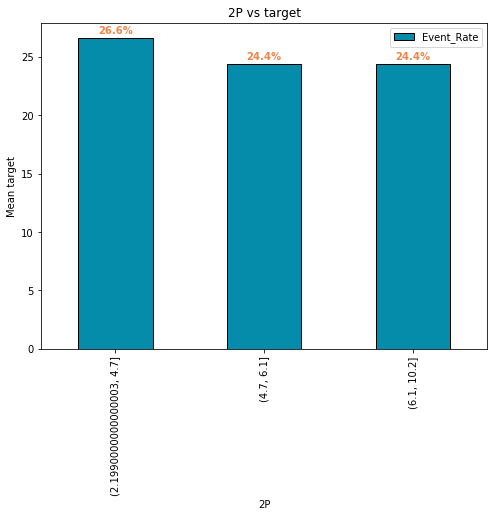

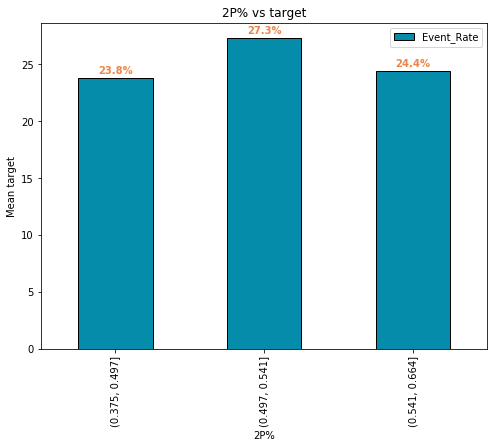

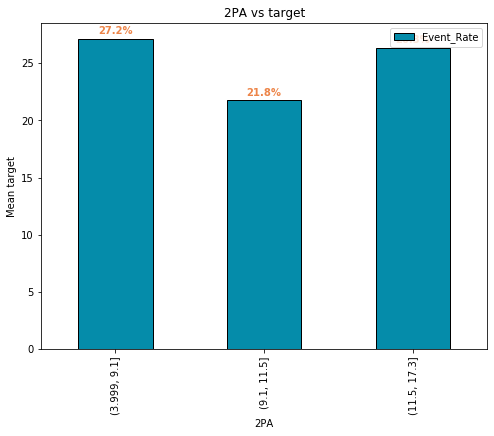

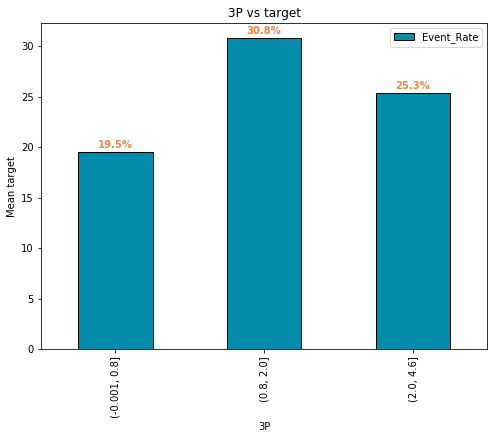

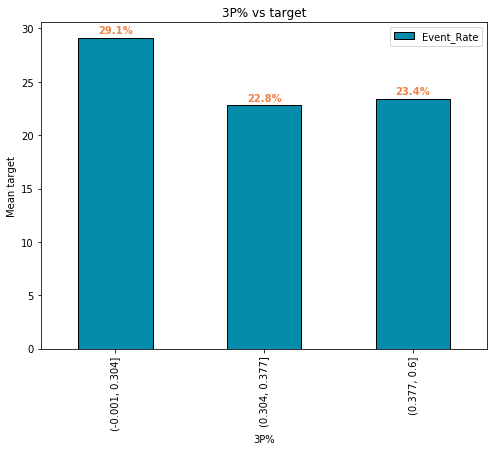

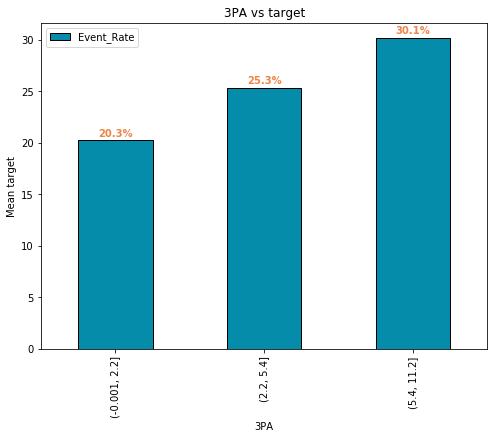

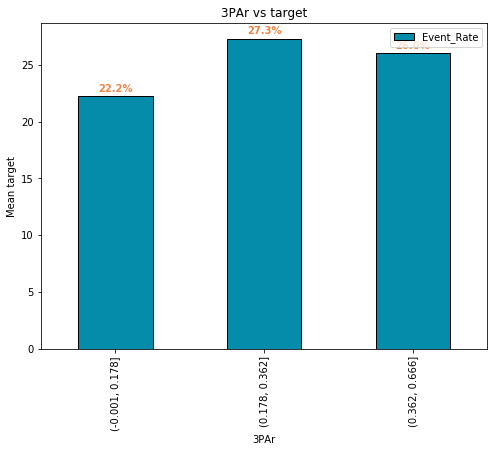

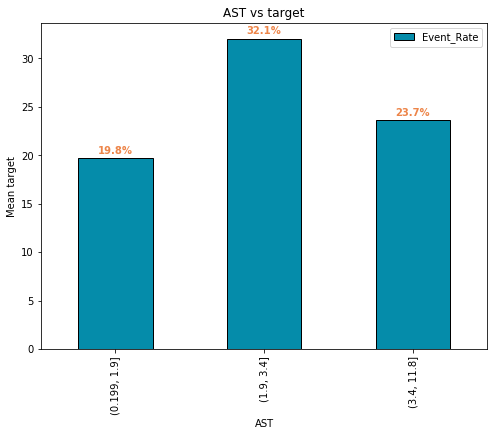

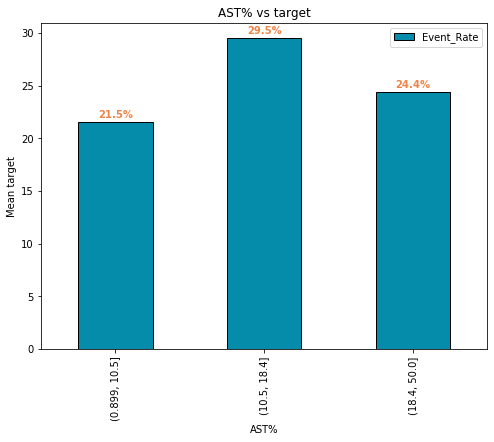

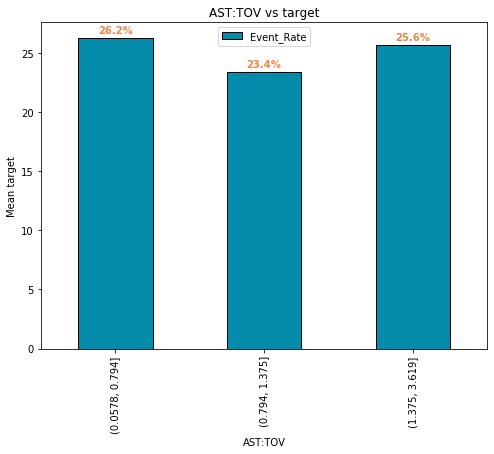

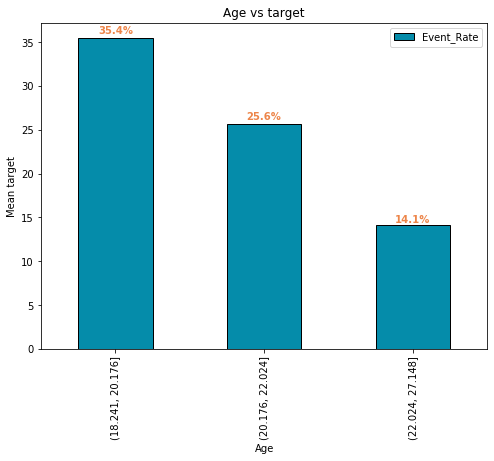

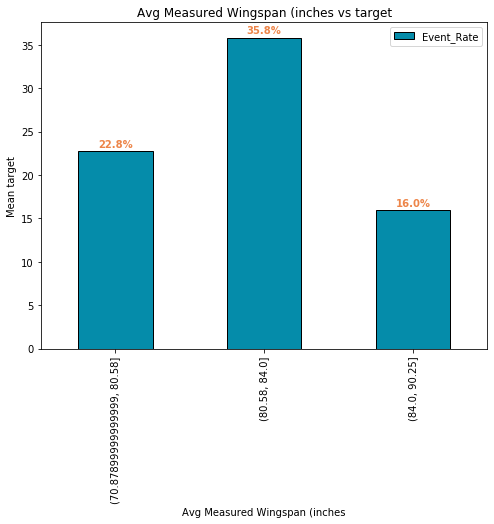

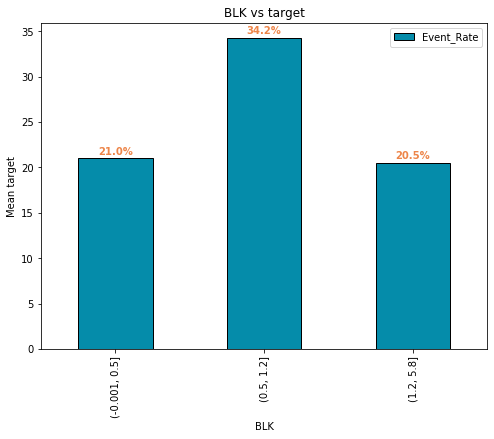

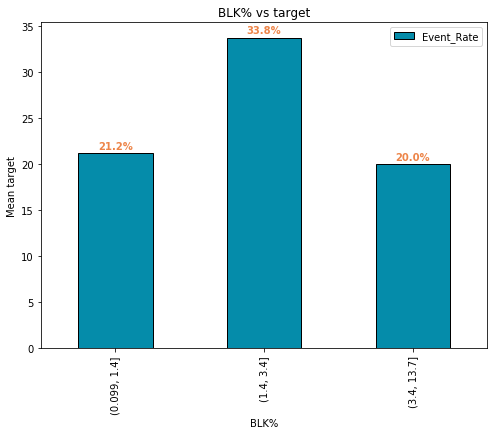

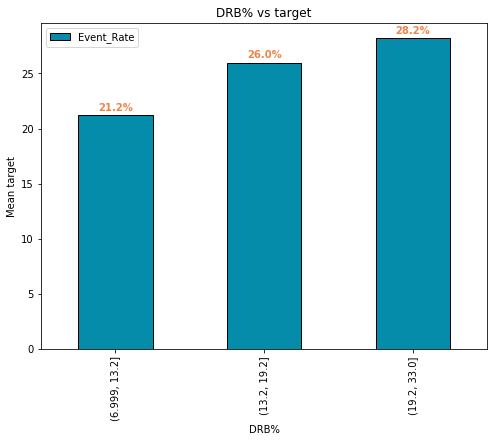

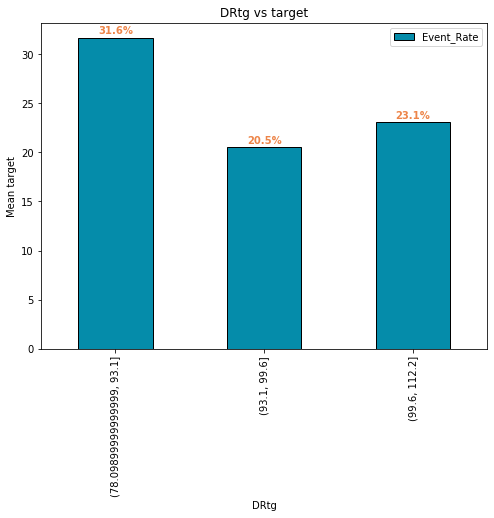

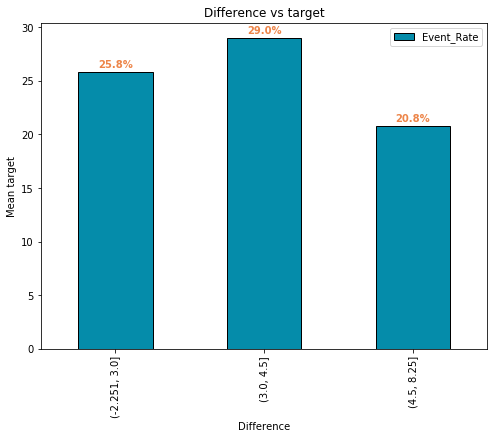

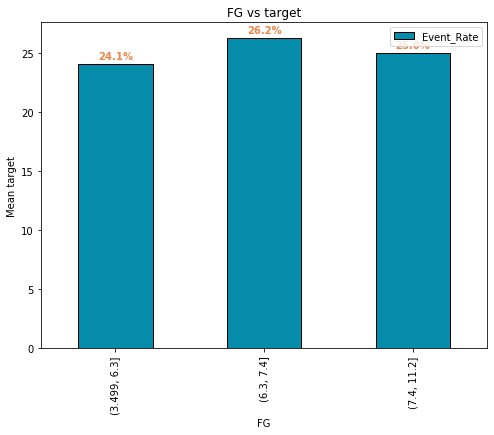

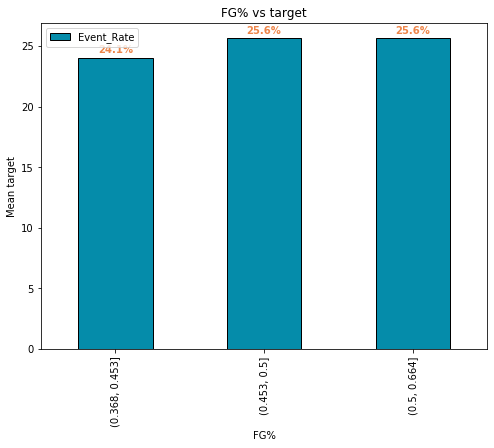

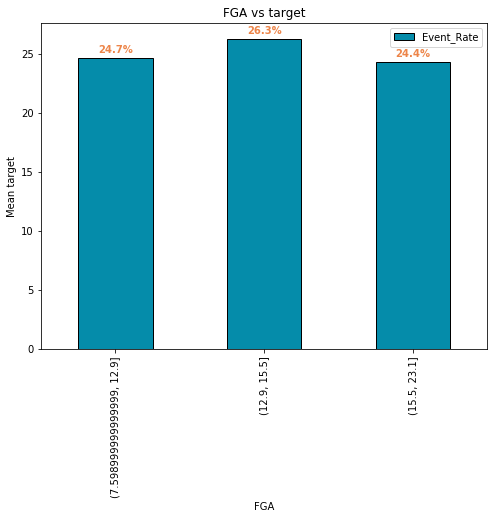

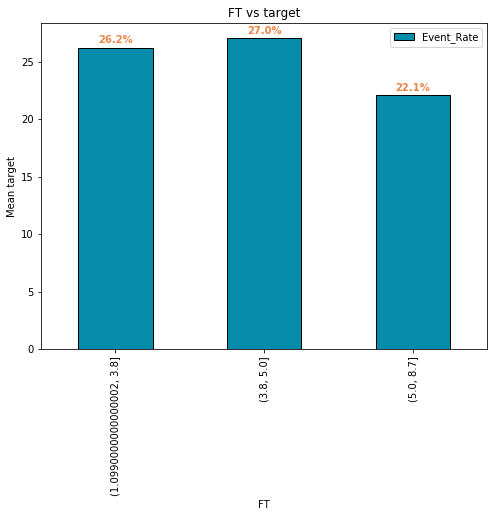

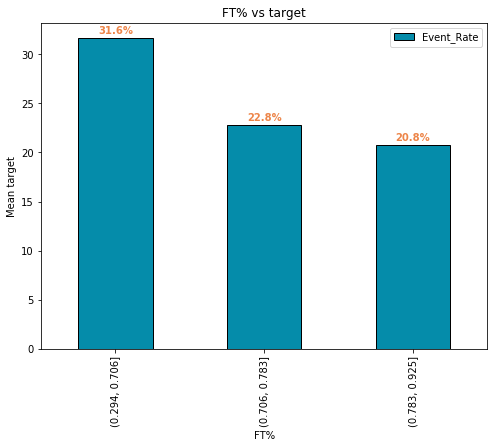

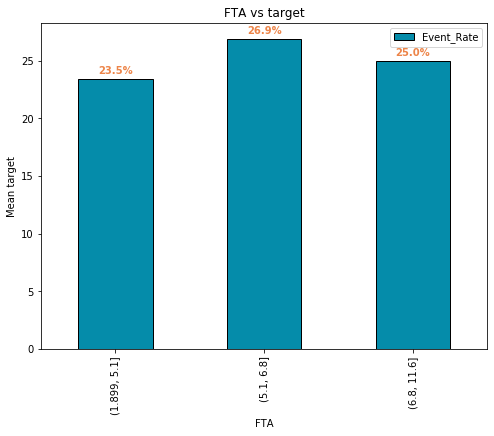

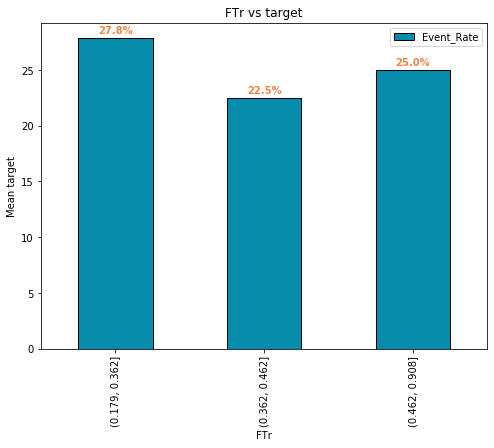

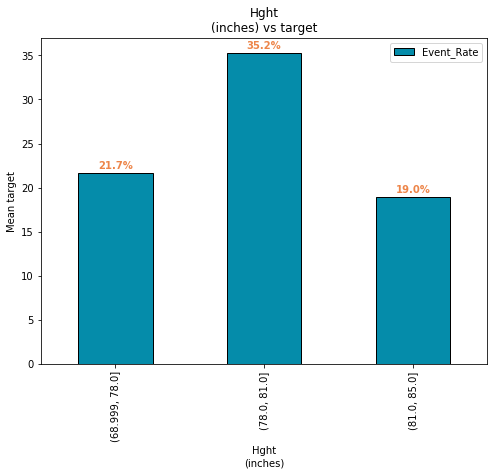

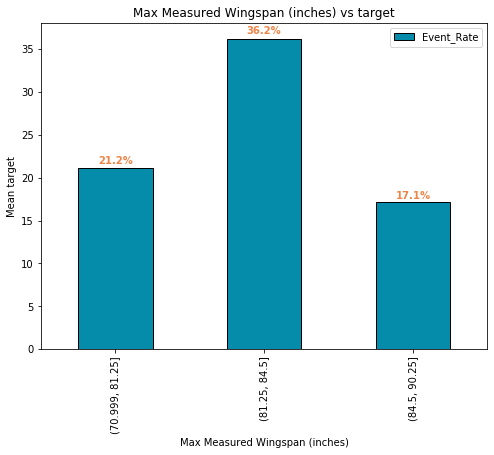

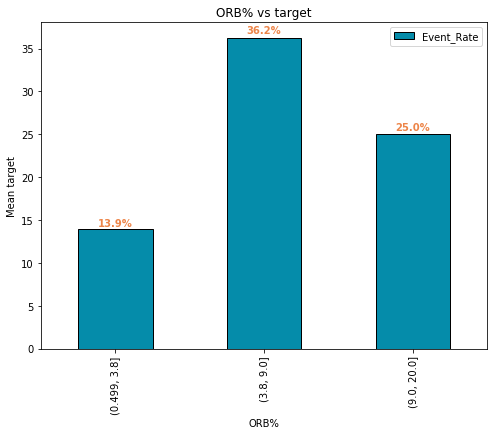

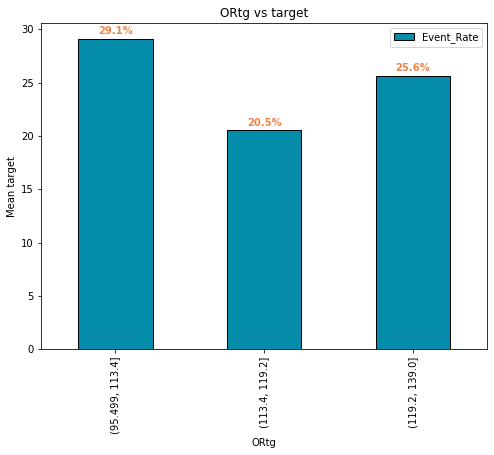

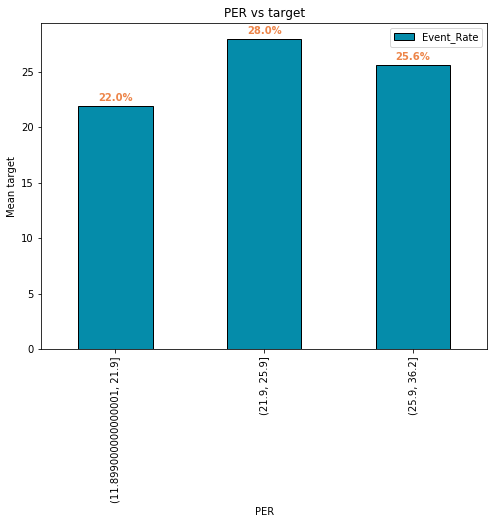

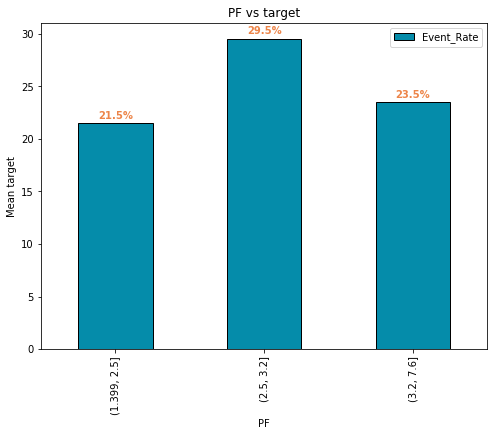

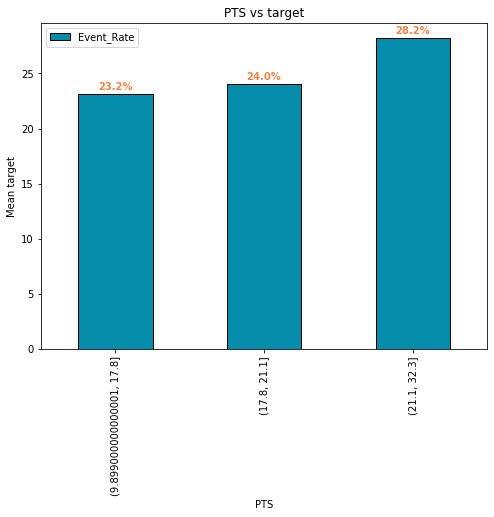

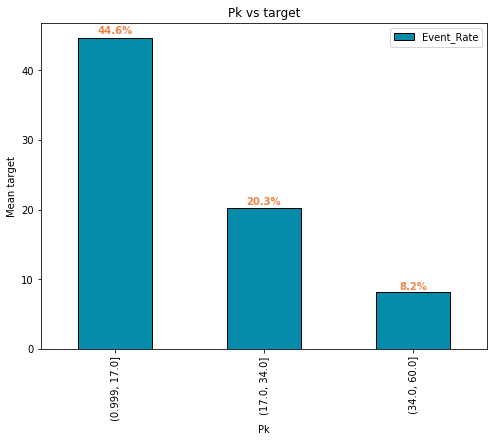

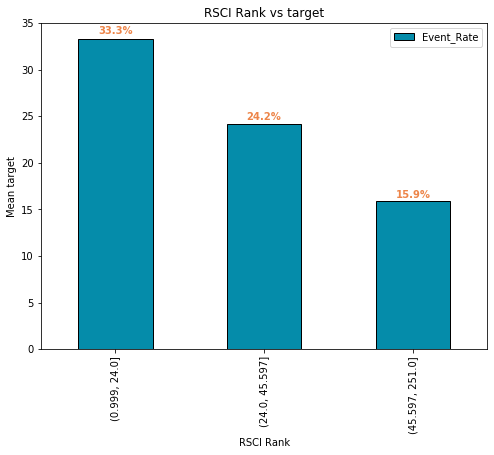

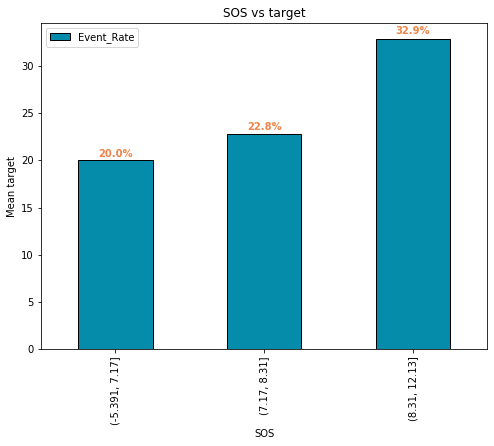

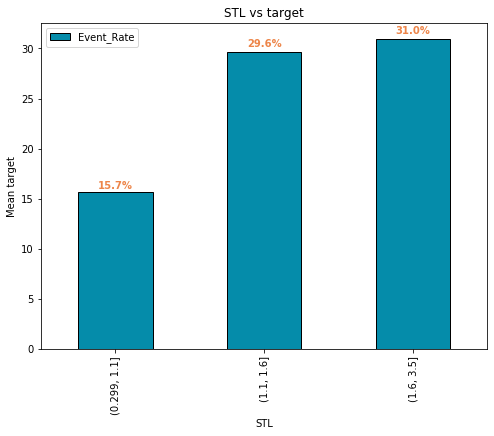

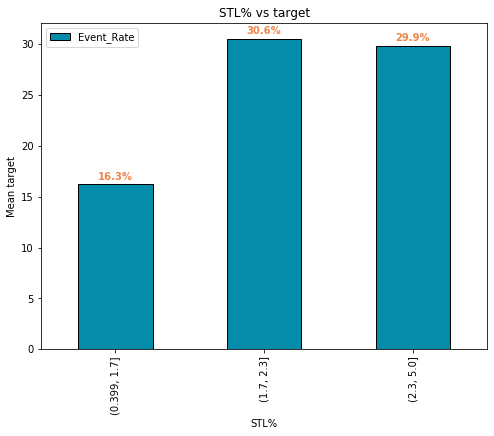

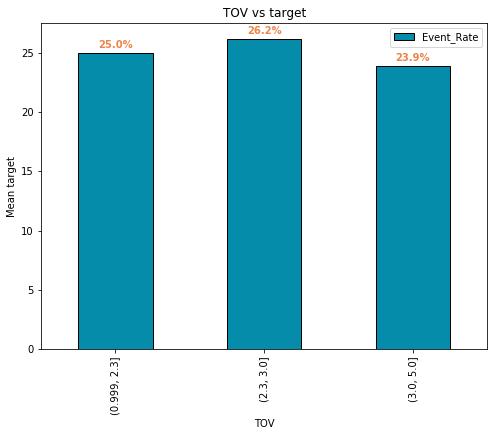

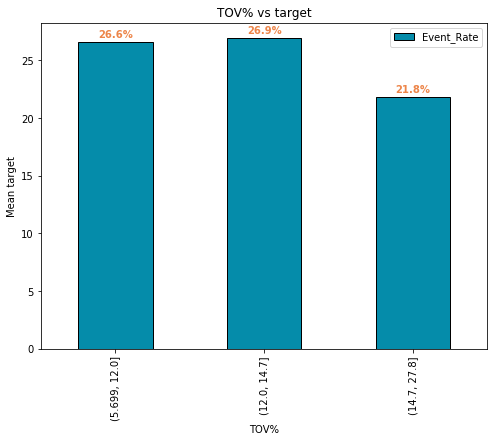

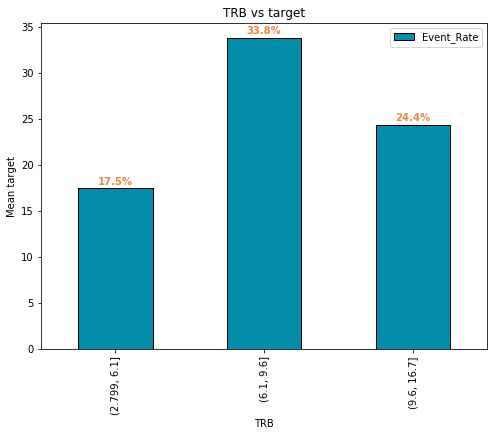

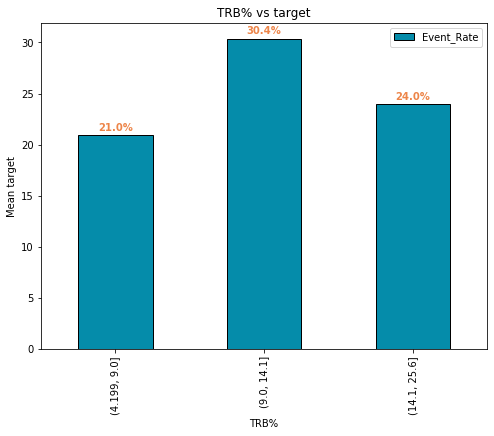

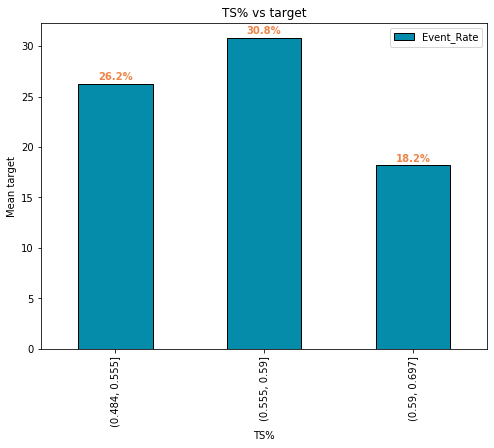

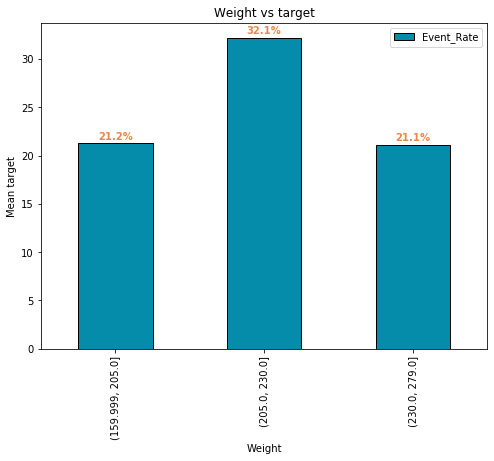

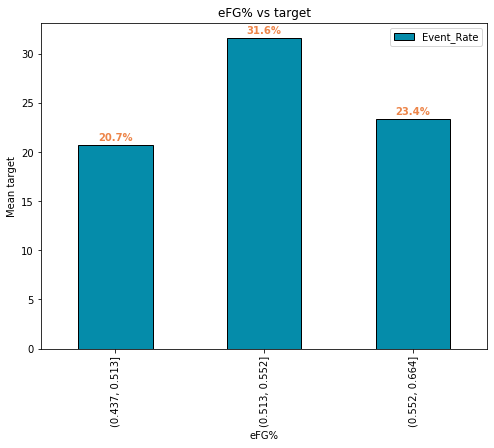

In [27]:
clf.plot(woe_df)

In [28]:
from xverse.ensemble import VotingSelector

clf = VotingSelector()
clf.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

VotingSelector(exclude_features=None, feature_names='all',
               handle_category='woe', minimum_votes=0, no_of_features=21,
               numerical_missing_values='median',
               selection_techniques=['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE'])

In [38]:
clf.available_techniques

['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE']

In [39]:
clf.feature_importances_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One
0,Pk,0.712463,0.080110,0.000000,0.092353,4.919869,-0.018455
1,ORB%,0.252297,0.022945,0.000000,0.022152,0.096715,0.000000
2,Age,0.230094,0.027044,-0.526936,0.037742,0.893458,0.000000
3,Avg Measured Wingspan (inches,0.192467,0.047137,-0.180349,0.024929,0.002949,0.000000
4,Max Measured Wingspan (inches),0.184226,0.007157,0.000000,0.038061,0.009945,0.000000
5,STL,0.151268,0.020132,0.388047,0.022772,0.639405,0.000000
6,STL%,0.137600,0.018235,0.221598,0.025923,0.621484,0.000000
7,RSCI Rank,0.136918,0.025401,0.000000,0.017545,0.442768,-0.000420
8,TRB,0.126816,0.028062,-0.190037,0.016522,0.085915,0.000000
9,Hght\n(inches),0.122981,0.002147,0.290898,0.034702,0.087133,0.003063


In [40]:
clf.feature_votes_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One,Votes
2,Age,1,1,1,1,1,1,6
18,FT%,1,1,1,1,1,1,6
0,Pk,1,1,0,1,1,1,5
15,AST,1,1,1,1,0,1,5
3,Avg Measured Wingspan (inches,1,1,1,1,0,1,5
1,ORB%,1,1,0,1,1,1,5
5,STL,1,0,1,1,1,1,5
6,STL%,1,0,1,1,1,1,5
8,TRB,1,1,1,0,1,1,5
9,Hght\n(inches),1,0,1,1,1,1,5


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [44]:
list(df.columns) 

['Player',
 'Pk',
 'Age',
 'SOS',
 'FG',
 'FGA',
 'FG%',
 '2P',
 '2PA',
 '2P%',
 '3P',
 '3PA',
 '3P%',
 'FT',
 'FTA',
 'FT%',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'ORtg',
 'DRtg',
 'PER',
 'TS%',
 'eFG%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'AST:TOV',
 'Hght\n(inches)',
 'Weight',
 'RSCI Rank',
 'Max Measured Wingspan (inches)',
 'Avg Measured Wingspan (inches',
 'Difference',
 'Starter']

In [45]:
features = ['SOS','FG','FGA','FG%', '2P','2PA','2P%','3P','3P%','FT','FTA','FT%','TRB','AST',
'STL','BLK','TOV','PF','PTS','ORtg','PER','TS%','eFG%','3PAr','FTr', 'ORB%','DRB%','TRB%','AST%',
 'BLK%','TOV%','AST:TOV','Hght\n(inches)','Weight','RSCI Rank', 'Max Measured Wingspan (inches)',
'Avg Measured Wingspan (inches', 'Difference']

In [46]:
import seaborn as sns

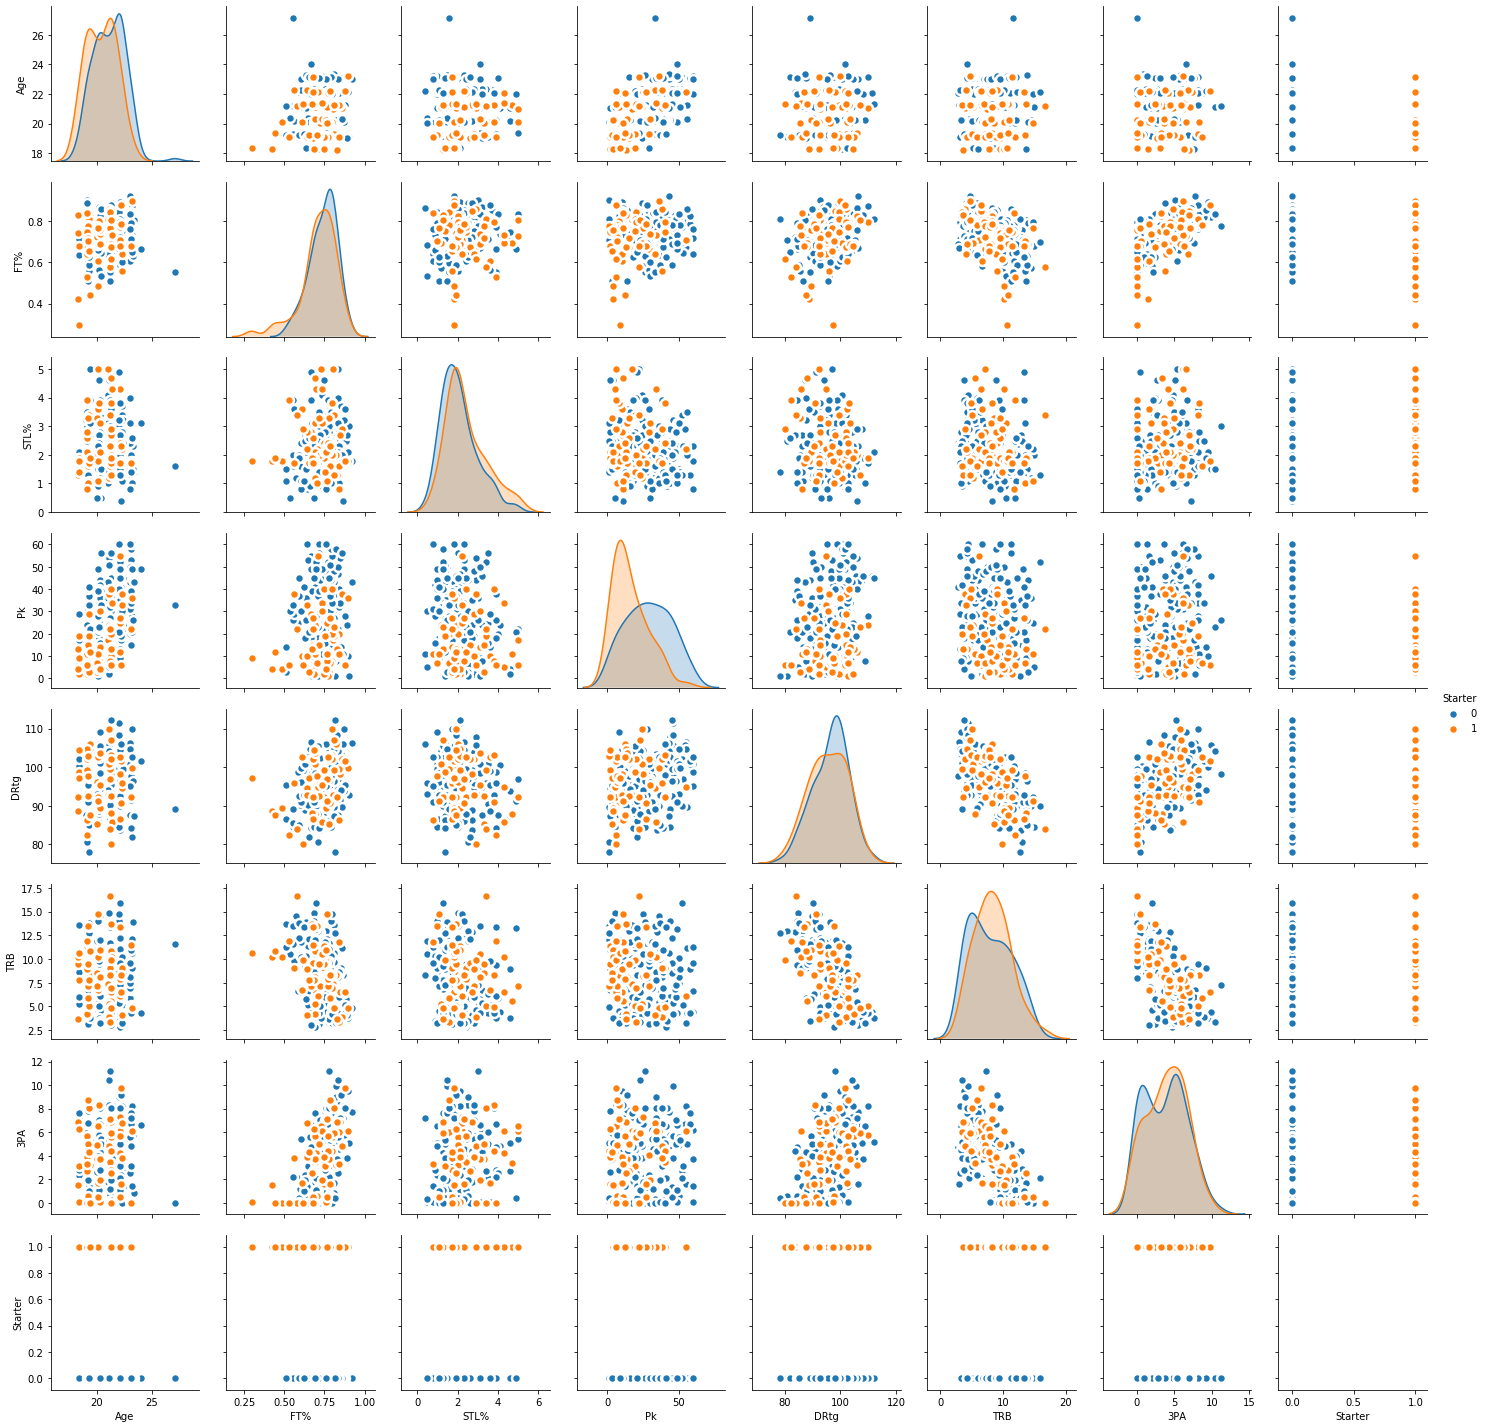

In [47]:
sns.pairplot(df[['Age','FT%','STL%','Pk','DRtg','TRB', '3PA', 'Starter']], hue='Starter',kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


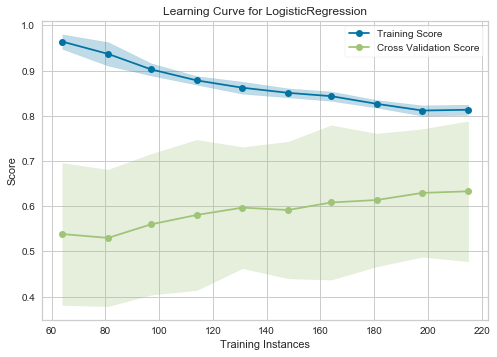

In [49]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = LearningCurve(
    model, cv=cv, scoring='roc_auc', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


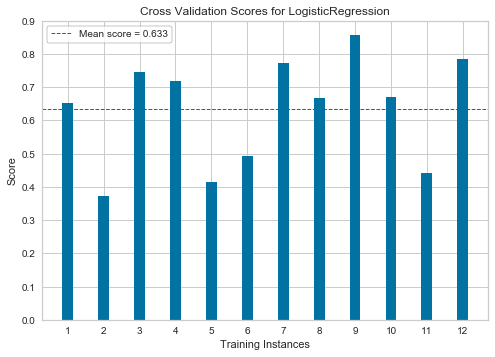

In [50]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = CVScores(model, cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [57]:
X = df.drop(['SOS','FG','FGA','FG%','2P','2PA','2P%','3P','3PA','3P%','FT','FTA','TRB', 'PER','Player',
 'STL','BLK','TOV','PF','PTS','ORtg','DRtg','TS%','eFG%','3PAr','Starter', 'FTr','DRB%', 'TRB%',
 'AST%','BLK%','TOV%','AST:TOV','Hght\n(inches)', 'Weight','RSCI Rank', 'Max Measured Wingspan (inches)',
 'Avg Measured Wingspan (inches','Difference'], axis=1)
y = df['Starter']

In [58]:
X

,Pk,Age,FT%,AST,ORB%,STL%
0,1,19.096,0.901,6.2,2.3,3.0
1,8,19.208,0.795,4.7,2.2,1.1
2,9,21.051,0.819,4.8,3.9,3.1
3,10,22.123,0.894,4.8,2.0,2.1
4,21,22.338,0.813,6.0,4.1,2.0
...,...,...,...,...,...,...
230,3,19.197,0.510,1.7,14.8,1.5
231,9,20.257,0.689,2.6,11.9,1.1
232,37,19.239,0.589,2.7,13.7,1.9
233,40,19.138,0.761,0.7,12.4,1.3


/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


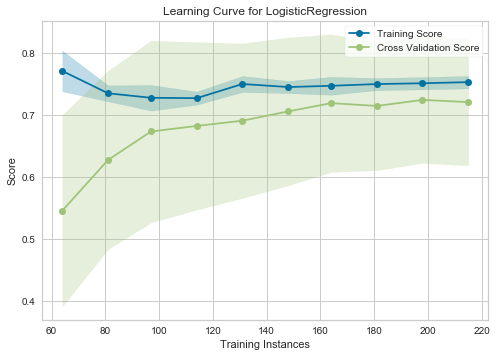

In [59]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = LearningCurve(
    model, cv=cv, scoring='roc_auc', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


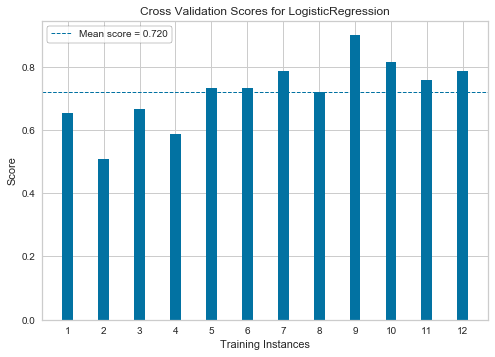

In [60]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = CVScores(model, cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [61]:
X

,Pk,Age,FT%,AST,ORB%,STL%
0,1,19.096,0.901,6.2,2.3,3.0
1,8,19.208,0.795,4.7,2.2,1.1
2,9,21.051,0.819,4.8,3.9,3.1
3,10,22.123,0.894,4.8,2.0,2.1
4,21,22.338,0.813,6.0,4.1,2.0
...,...,...,...,...,...,...
230,3,19.197,0.510,1.7,14.8,1.5
231,9,20.257,0.689,2.6,11.9,1.1
232,37,19.239,0.589,2.7,13.7,1.9
233,40,19.138,0.761,0.7,12.4,1.3


In [65]:
features = ['Pk', 'Age', 'FT%','AST','ORB%','STL%']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Train accuracy: 0.7670454545454546
Test accuracy: 0.7288135593220338
ROC AUC: 0.7848837209302326


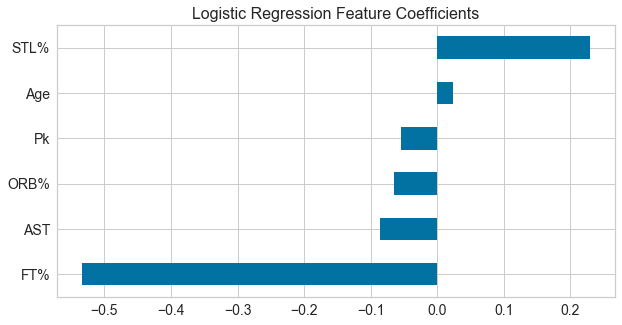

In [67]:
logreg = LogisticRegression(solver='liblinear', random_state=2).fit(x_train, y_train)
y_scores_logreg = logreg.predict_proba(x_test)[:,1]
y_pred_logreg = logreg.predict(x_test)

print("Train accuracy:",logreg.score(x_train, y_train))
print("Test accuracy:", logreg.score(x_test, y_test))
print("ROC AUC:", roc_auc_score(y_test, y_scores_logreg))

ax = pd.DataFrame(
    logreg.coef_.transpose(),
    index=features,
    columns=['coefficients']
).sort_values('coefficients').plot(
    kind='barh', legend=False, title='Logistic Regression Feature Coefficients', figsize=(10,5), fontsize=14
)

ax.title.set_size(16)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [69]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [70]:
xg_cl = xgb.XGBClassifier()

In [71]:
params = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}

In [72]:
grid_search = GridSearchCV(xg_cl, params, cv = 3, verbose=10, n_jobs=-1)

In [73]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1979s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1084s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  66 out of  81 | elapsed:    2.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed:    2.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    2.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.16],
                         'max_depth': [10, 30, 50],
                         'min_child_weight': [1, 3, 6], 

In [74]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=6, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [75]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [76]:
xg = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=6, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1).fit(X_train, Y_train)
y_scores_xg = xg.predict_proba(X_test)[:,1]

print("Train Accuracy:",xg.score(X_train, Y_train))
print("Test Accuracy:", xg.score(X_test, Y_test))
print("ROC AUC:", roc_auc_score(Y_test, y_scores_xg))

Train Accuracy: 0.8579545454545454
Test Accuracy: 0.711864406779661
ROC AUC: 0.7223837209302325


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


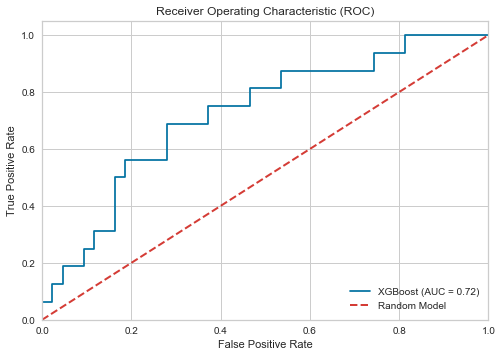

In [77]:
xg_roc_auc = roc_auc_score(Y_test, y_scores_xg)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_scores_xg)
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % xg_roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random Model', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [78]:
import shap

In [79]:
explainer = shap.TreeExplainer(xg)

In [80]:
shap_values = explainer.shap_values(X_train)

In [81]:
shap.initjs()

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/summary.py:464: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


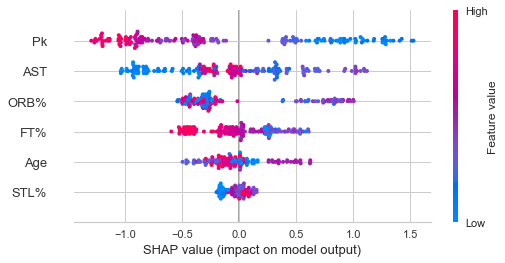

In [82]:
shap.summary_plot(shap_values, X_train)

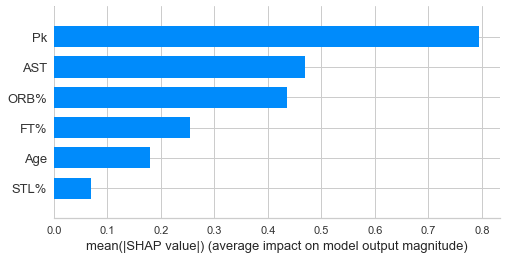

In [83]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


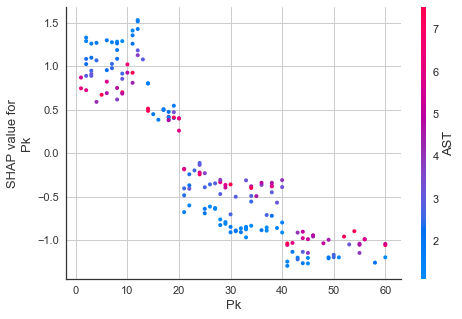

In [84]:
shap.dependence_plot('Pk', shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


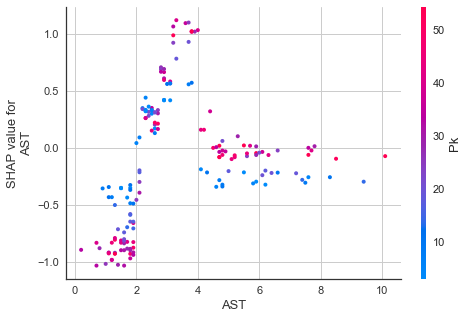

In [85]:
shap.dependence_plot("AST", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


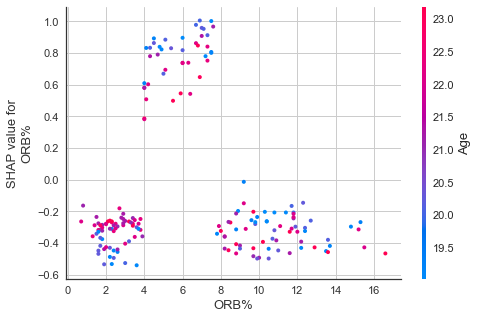

In [86]:
shap.dependence_plot("ORB%", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


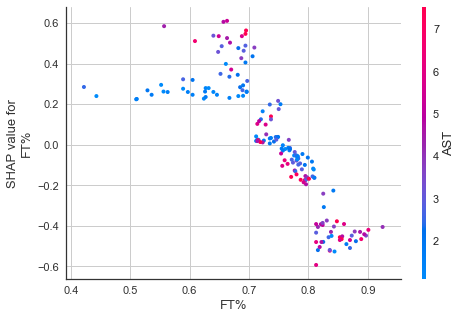

In [87]:
shap.dependence_plot("FT%", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


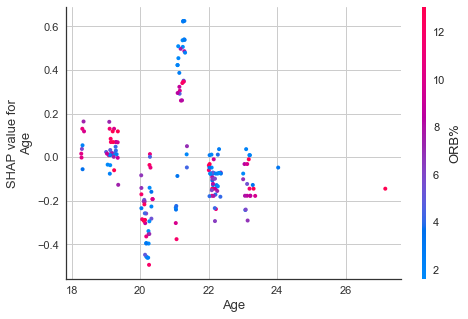

In [88]:
shap.dependence_plot("Age", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


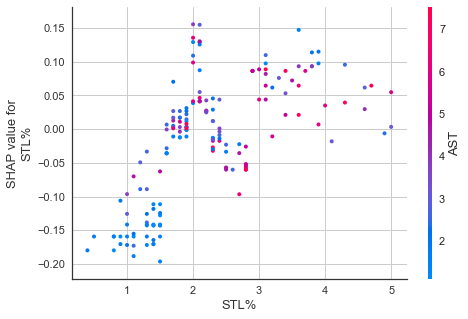

In [89]:
shap.dependence_plot("STL%", shap_values, X_train)